In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df = df.rename(columns={'Genre': 'Gender'})

In [8]:
spending_by_gender = df.groupby('Gender')['Spending Score (1-100)'].mean()
spending_by_gender

Gender
Female    51.526786
Male      48.511364
Name: Spending Score (1-100), dtype: float64

<BarContainer object of 2 artists>

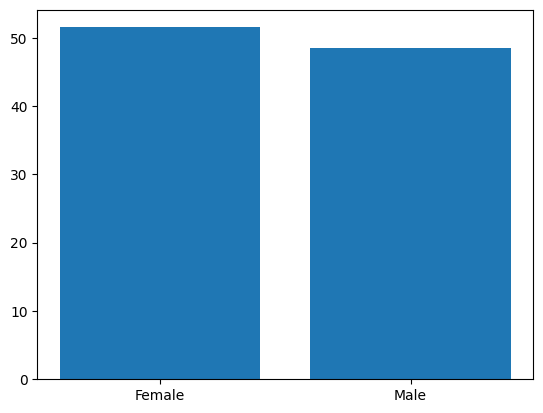

In [9]:
import matplotlib.pyplot as plt
plt.bar(spending_by_gender.index, spending_by_gender.values)

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

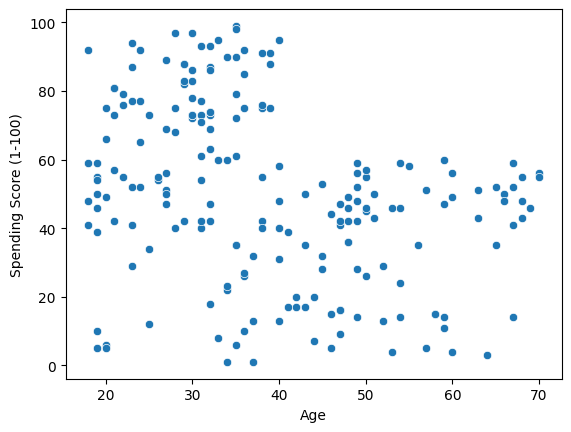

In [10]:
import seaborn as sns
sns.scatterplot(df, x='Age', y='Spending Score (1-100)')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

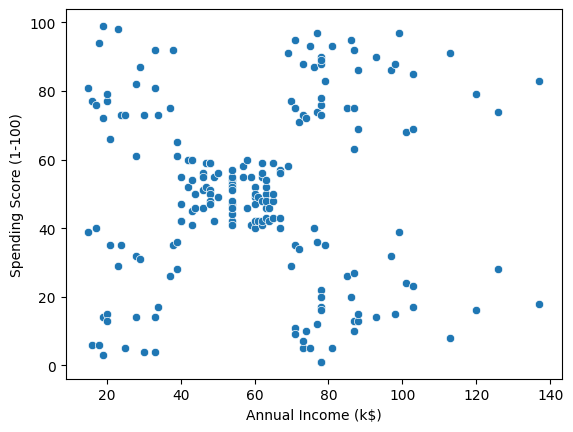

In [12]:
sns.scatterplot(df, x='Annual Income (k$)', y='Spending Score (1-100)')


In [13]:
X = df.drop(columns=['CustomerID', 'Gender', 'Age']).values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [14]:
from sklearn.cluster import KMeans
inertia = []
for i in range(2, 11):
 model = KMeans(n_clusters=i, random_state=7)
 model.fit(X)
 inertia.append(model.inertia_)

In [15]:
inertia

[184131.88502788506,
 154609.8703489493,
 73880.64496247195,
 44448.4554479337,
 38858.959975143895,
 31969.42655023547,
 29829.73963965766,
 28268.814302583385,
 21681.52225712884]

Text(0, 0.5, 'Inertia')

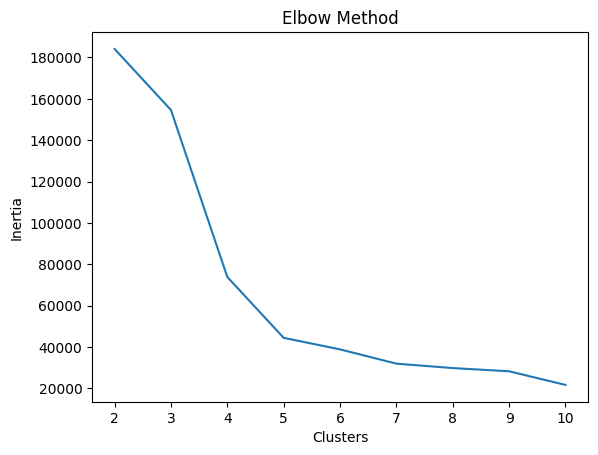

In [16]:
plt.plot(range(2, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

In [17]:
KMeansModel = KMeans(n_clusters=5, random_state=786)
KMeansModel.fit(X)
centers = KMeansModel.cluster_centers_
centers


array([[86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [55.2962963 , 49.51851852]])

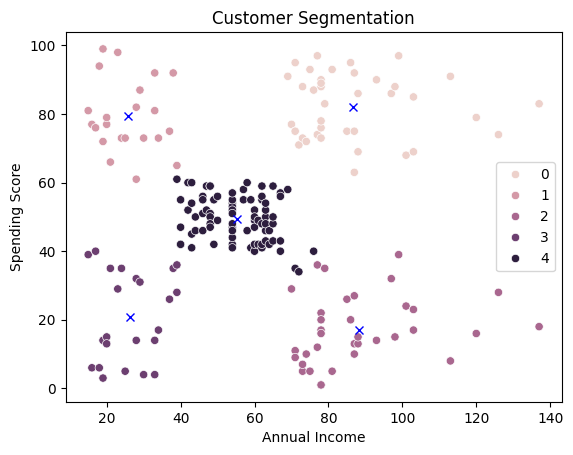

In [18]:
center_x = centers[:, 0]
center_y = centers[:, 1]
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=KMeansModel.predict(X))
plt.plot(center_x, center_y, 'xb')
plt.title('Customer Segmentation')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()